# KCNH5 and developmental and epileptic encephalopathy-112 (DEE112)


[DEE112](https://omim.org/entry/620537) is caused by heterozygous mutation in the [KCNH5](https://omim.org/entry/605716) gene.

KCNH5 encodes the voltage-gated potassium channel EAG2/Kv10.2. developmental and epileptic
encephalopathy 112 (DEE112) an autosomal dominant disorder characterized by a wide range of seizure types, including focal and generalized seizures. Cognitive outcomes range from normal intellect to profound impairment ([Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/)).

For this analysis, we have collected data from the following publications.

- [Veeramah KR,  et al., 2013](https://pubmed.ncbi.nlm.nih.gov/23647072/) Exome sequencing reveals new causal mutations in children with epileptic encephalopathies. 
- [Minardi R, et al., 2020](https://pubmed.ncbi.nlm.nih.gov/32725632/) Whole-exome sequencing in adult patients with developmental and epileptic encephalopathy: It is never too late. 
- [Hu X, et al., 2022](https://pubmed.ncbi.nlm.nih.gov/35874597/),Clinical Feature, Treatment, and KCNH5 Mutations in Epilepsy.
- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/), Neurodevelopmental and Epilepsy Phenotypes in Individuals With Missense Variants in the Voltage-Sensing and Pore Domains of KCNH5.
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) Clinical phenotypes of developmental and epileptic encephalopathy-related recurrent KCNH5 missense variant p.R327H in Chinese children. 

- [Happ et a., 2023](https://pubmed.ncbi.nlm.nih.gov/36307226/) reported that
>  Individuals with the recurrent p.Arg333His variant had a self-limited drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE. 
- [Huang S, et al., 2024 ](https://pubmed.ncbi.nlm.nih.gov/38708366/) described potential correlations for R327H
> The authors investigate the first Chinese cohort of KCNH5 p.R327H-associated DEE and the incomplete penetrance of this KCNH5 variant. Add-on VPA therapy could be effective in such patients, especially in their early stages.

None of the above publications applied formal statistical testing to the data.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


### KCNH5
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for KCNH5.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = "KCNH5"
mane_tx_id = 'NM_139318.5'
mane_protein_id = 'NP_647479.2' 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(release="0.1.24") as ps:
  phenopackets = list(ps.iter_cohort_phenopackets(gene_symbol))
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
   phenopackets=phenopackets,
   cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 27/27 [00:00<00:00, 835.06 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #24
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [4]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
24,EEG abnormality
19,Epileptic encephalopathy
17,Bilateral tonic-clonic seizure
13,Intellectual disability
11,Global developmental delay
11,Delayed speech and language development
7,Focal-onset seizure
6,Bilateral tonic-clonic seizure with focal onset
5,Focal motor seizure
5,Autistic behavior


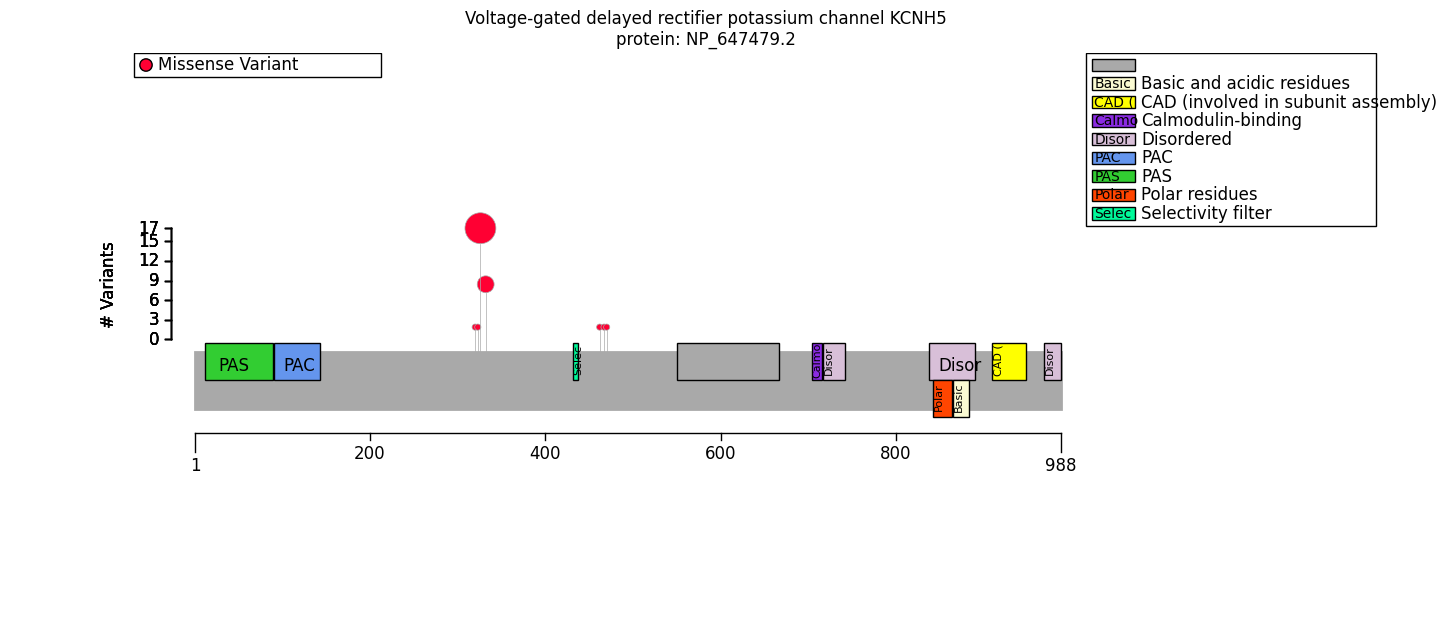

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

kcnh5_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
kcnh5_fig.tight_layout()

# Genotype Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier

r327h = variant_key("14_62950522_62950522_C_T")  # c.980G>A; p.Arg327His
r333h = variant_key("14_62950504_62950504_C_T") # c.998G>A	p.Arg333His

r327h_clf = monoallelic_classifier(
    a_predicate=r327h,
    b_predicate=r333h,
    a_label="Arg327His",
    b_label="Arg333His"
)
r327h_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r327h_clf,
    pheno_clfs=pheno_clfs,
)

mtc_viewer = MtcStatsViewer()
mtc_viewer.process(r327h_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,24
HMF03,Skipping term because of a child term with the same individual counts,4
HMF05,Skipping term because one genotype had zero observations,1
HMF08,Skipping general term,15
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,41


In [8]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo=hpo, result=r327h_result)

Allele group,Arg327His,Arg333His,Corrected p values,p values
Epileptic encephalopathy [HP:0200134],15/15 (100%),0/3 (0%),0.015931,0.001225
Intellectual disability [HP:0001249],11/11 (100%),0/2 (0%),0.083333,0.012821
EEG abnormality [HP:0002353],16/16 (100%),2/4 (50%),0.136842,0.031579
Focal impaired awareness motor seizure [HP:0032712],1/8 (12%),2/4 (50%),0.768182,0.236364
Bilateral tonic-clonic seizure with focal onset [HP:0007334],3/12 (25%),2/4 (50%),1.000000,0.546703
Focal-onset seizure [HP:0007359],13/13 (100%),2/2 (100%),1.000000,1.000000
Neurodevelopmental delay [HP:0012758],15/15 (100%),2/2 (100%),1.000000,1.000000
Bilateral tonic-clonic seizure [HP:0002069],15/16 (94%),4/4 (100%),1.000000,1.000000
Neurodevelopmental abnormality [HP:0012759],16/16 (100%),2/2 (100%),1.000000,1.000000
Abnormality of central nervous system electrophysiology [HP:0030178],16/16 (100%),2/2 (100%),1.000000,1.000000


In [9]:
from gpsea.analysis.clf import sex_classifier
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Epileptic encephalopathy [HP:0200134],8/11 (73%),11/11 (100%),1.0,0.214286
EEG abnormality [HP:0002353],12/14 (86%),12/12 (100%),1.0,0.483077
Intellectual disability [HP:0001249],5/7 (71%),8/9 (89%),1.0,0.550000
Neurodevelopmental delay [HP:0012758],10/10 (100%),11/11 (100%),1.0,1.000000
Neurodevelopmental abnormality [HP:0012759],10/10 (100%),12/12 (100%),1.0,1.000000
Motor seizure [HP:0020219],10/10 (100%),6/6 (100%),1.0,1.000000
Focal-onset seizure [HP:0007359],11/11 (100%),9/9 (100%),1.0,1.000000
Bilateral tonic-clonic seizure [HP:0002069],12/12 (100%),11/12 (92%),1.0,1.000000
Abnormality of central nervous system electrophysiology [HP:0030178],12/12 (100%),12/12 (100%),1.0,1.000000
Seizure [HP:0001250],14/14 (100%),13/13 (100%),1.0,1.000000


# Summary

In [10]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=r327h_result,
    ),
     GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)
cohort_name = gene_symbol

caption = """Two recurrent variants have been reported, p.Arg327His and p.Arg333His, both of which are located in or near the functionally critical 
voltage-sensing or pore domains. Happ et al (2023) state that in their cohort, Individuals with the recurrent p.Arg333His variant had a self-limited 
drug-responsive focal or generalized epilepsy and normal intellect, whereas the recurrent p.Arg327His variant was associated with infantile-onset DEE."""

report = GpseaAnalysisReport(
    name=cohort_name,
    cohort=cohort,
    fet_results=fet_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
    caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [12]:
summarizer.process_latex(report=report, protein_fig=kcnh5_fig)

Figure saved to ../../supplement/img/KCNH5_protein_diagram-draft.pdf
Output to ../../supplement/tex/KCNH5_summary_draft.tex
